#Q1
Definition and problem types of classification decision tree:
Classification decision tree is a supervised learning algorithm used to solve classification problems. It divides data into different classes through a series of binary (or multi-branch) splits based on features. The final result of the decision tree is a tree structure, where leaf nodes represent classification results and branches represent decision rules based on features.

The main difference between classification decision trees and multiple linear regression is the type of problem and the prediction target. Classification decision trees are used to solve classification problems, where the goal is to assign data points to discrete categories. For example, predicting whether a user is likely to buy a product ("yes" or "no") based on their features. It divides the data through feature-based decision rules and ultimately outputs a class label. Multiple linear regression, on the other hand, is used to solve regression problems, where the goal is to predict a continuous numerical outcome, such as predicting house prices based on house size and location. Multiple linear regression fits a linear equation and outputs the weighted sum of the features.

#Q2
Accuracy is the proportion of correct predictions (including true positives and true negatives) to the total number of samples. It is suitable for class-balanced datasets, meaning that the probability of the result being positive or negative is similar, such as weather forecasts.
Sensitivity is the proportion of actual positive examples that are correctly predicted as positive (true positive rate). It is suitable for scenarios that focus on missed reports, that is, situations where as many positive examples as possible need to be identified. Medical scenarios are related to disease examinations.
Specificity is the proportion of actual negative examples that are correctly predicted as negative (true negative rate). It is suitable for scenarios where false positives are a concern, i.e., it is necessary to minimize the number of cases where negative examples are incorrectly predicted as positive, such as spam detection.
Precision is the proportion of samples predicted by the model as positive examples that are actually positive (positive prediction value). It is suitable for scenarios where the cost of false positives is high, that is, it is necessary to ensure the accuracy of the predictions of positive examples, such as promotion or sales scenarios.
https://chatgpt.com/share/67450a98-7100-8006-893b-86063f883ada

In [14]:
#Q3
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")


url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")
ab = ab.dropna()
ab["Pub year"] = ab["Pub year"].astype(int)
ab["NumPages"] = ab["NumPages"].astype(int)
ab["Hard_or_Paper"] = ab["Hard_or_Paper"].astype("category")


print(ab.info())
print(ab.head())
#https://chatgpt.com/share/67450a98-7100-8006-893b-86063f883ada

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

Training set observations: 255
Testing set observations: 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paper'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paper'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paper'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paper'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hard'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hard'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paper')]

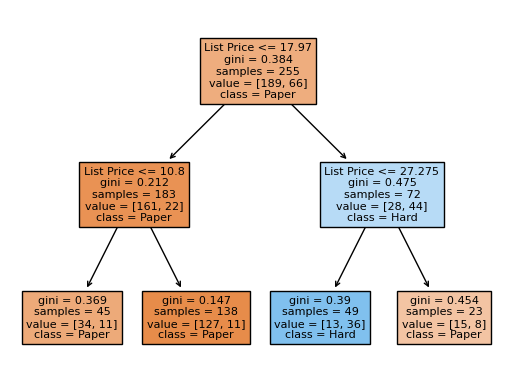

In [15]:
#Q4
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree


url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")


ab = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")  
ab = ab.dropna()  
ab["Pub year"] = ab["Pub year"].astype(int)  
ab["NumPages"] = ab["NumPages"].astype(int)
ab["Hard_or_Paper"] = ab["Hard_or_Paper"].astype("category")


ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab, test_size=0.2, random_state=42)


print(f"Training set observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing set observations: {len(ab_reduced_noNaN_test)}")


y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  
X = ab_reduced_noNaN_train[['List Price']] 


clf = DecisionTreeClassifier(max_depth=2, random_state=42)  
clf.fit(X, y)

tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paper", "Hard"], filled=True)
#https://chatgpt.com/share/67450a98-7100-8006-893b-86063f883ada

Visualizing Decision Tree with tree.plot_tree...
Visualizing Decision Tree with graphviz...


'decision_tree_clf2.pdf'

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'decision_tree_clf2.pdf'


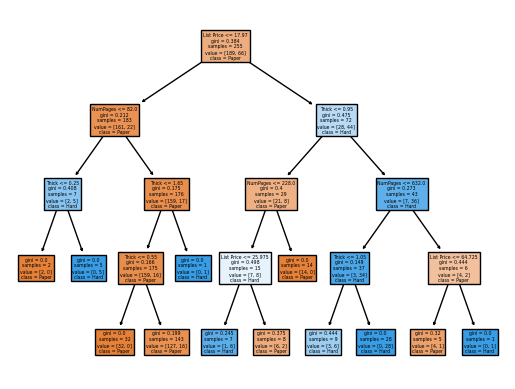

In [16]:
#Q5
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz


url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")


ab = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")  # Remove unnecessary columns
ab = ab.dropna()  # Drop rows with NaN
ab["Pub year"] = ab["Pub year"].astype(int)  # Convert to int
ab["NumPages"] = ab["NumPages"].astype(int)
ab["Hard_or_Paper"] = ab["Hard_or_Paper"].astype("category")

b_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab, test_size=0.2, random_state=42)


y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Predictor variables


clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)


print("Visualizing Decision Tree with tree.plot_tree...")
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=["Paper", "Hard"], 
    filled=True
)


print("Visualizing Decision Tree with graphviz...")
dot_data = tree.export_graphviz(
    clf2, 
    out_file=None, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=["Paper", "Hard"], 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_clf2")  
graph.view()  
#https://chatgpt.com/share/67450a98-7100-8006-893b-86063f883ada

Metrics for clf:
Confusion Matrix:
[[40  4]
 [ 6 14]]
Accuracy: 0.84
Sensitivity (Recall): 0.70
Specificity: 0.91

Metrics for clf2:
Confusion Matrix:
[[40  4]
 [ 5 15]]
Accuracy: 0.86
Sensitivity (Recall): 0.75
Specificity: 0.91



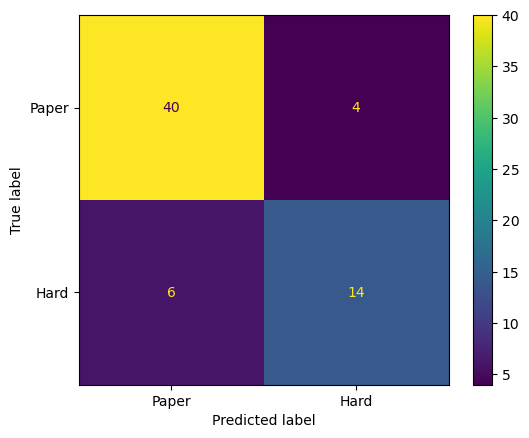

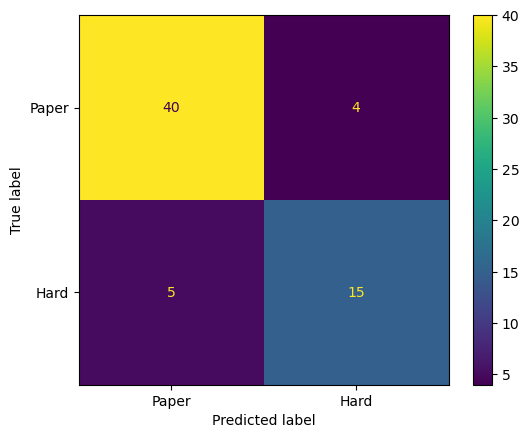

In [17]:
#Q6
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score


y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target variable
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Test data for clf
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Test data for clf2


y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)


def calculate_metrics(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel() 


    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)  
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  

    print(f"Metrics for {model_name}:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Sensitivity (Recall): {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print()


ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Paper", "Hard"]).plot()


calculate_metrics(y_test, y_pred_clf, "clf")


calculate_metrics(y_test, y_pred_clf2, "clf2")
#https://chatgpt.com/share/67450a98-7100-8006-893b-86063f883ada

#Q7:
The difference between the two confusion matrices is mainly caused by the different feature sets used by the models. For the first confusion matrix, clf only uses List Price as a single feature, which limits the model's predictive power because it ignores other potentially useful information. In contrast, the clf2 model in the second confusion matrix uses three features, NumPages, Thick, and List Price, thereby capturing more feature interactions and complex relationships, so its classification performance is generally better.
https://chatgpt.com/share/67450a98-7100-8006-893b-86063f883ada

#Q8
1. Scikit-learn provides the feature_importances_ attribute to measure the contribution of each feature to the decision tree prediction.It evaluates the importance of a feature by calculating the contribution of each split node to the improvement of the overall purity of the model (such as Gini or entropy).Visualizing feature importance can use charts (such as bar charts) to intuitively show the contribution of each feature.
https://chatgpt.com/share/67450a98-7100-8006-893b-86063f883ada

Feature Importances for clf2:
      Feature  Importance
2  List Price    0.485974
1       Thick    0.297490
0    NumPages    0.216537


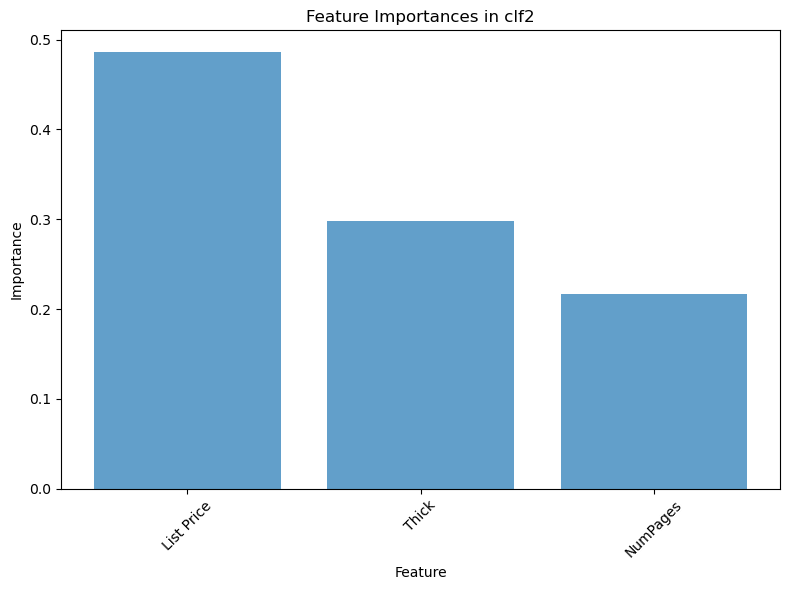

The most important predictor variable is 'List Price' with an importance of 0.49.


In [19]:
#2
import matplotlib.pyplot as plt
import pandas as pd


feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


print("Feature Importances for clf2:")
print(importance_df)


plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], alpha=0.7)
plt.title('Feature Importances in clf2')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

most_important_feature = importance_df.iloc[0]
print(f"The most important predictor variable is '{most_important_feature['Feature']}' with an importance of {most_important_feature['Importance']:.2f}.")
#https://chatgpt.com/share/67450a98-7100-8006-893b-86063f883ada

#Q9
In linear model regression, the coefficients directly quantify the independent contribution of each feature to the target variable, interpreted as a global linear relationship. For example, a feature with a coefficient of
b means that a 1-unit increase in the feature value will increase the predicted value of the target variable by b units on average (assuming other variables remain constant). This interpretation is simple and transparent because the model assumes that the relationship between features is linear and that the effect is constant across the data. For example, if List Price has a coefficient of 2, it means that for every 1-unit increase in price, the predicted sales of the book will increase by 2 units on average.

In contrast, the feature importance of decision trees reflects the contribution of a feature in reducing impurity in a split node and is a cumulative heuristic metric. Decision trees model data by gradually splitting data into purer subsets, and this split is based on local decisions. Feature importance measures the contribution of a feature to the overall predictive power of the model across all node splitting rules, rather than the direct relationship of the feature to the target variable. Feature importance can be determined by complex interactions, making it difficult to intuitively understand the specific impact of each feature on the target variable. For example, if List Price has an importance of 0.5, it indicates that Price significantly reduces data impurity in the split node, but the exact impact depends on how the data is distributed, and how the other features are combined with the split. There is no simple "Price increased by X, the target variable changed by Y" explanation.